In [1]:
import pandas as pd
from pyplotz.pyplotz import PyplotZ, plt
pltz = PyplotZ()
pltz.enable_chinese()

# Historical prices

In [8]:
# Parameter
price_path = "../data/clean_data/china_stock_price_20200906.csv"
save_return_path = "../data/clean_data/return_20200906.csv"
stock_list = ["伊利股份", "海螺水泥", "恒瑞医药"]

In [3]:
df_all = pd.read_csv(price_path)
df_p = df_all[df_all["name"].isin(stock_list)][["symbol", "name", "trade_date", "close"]]
df_p["trade_date"] = pd.to_datetime(df_p["trade_date"])
df_p["trade_date"] = df_p["trade_date"].dt.to_period("M").astype(str)
df_p["trade_date"] = pd.to_datetime(df_p["trade_date"])
df_p = df_p.groupby(["symbol", "name", "trade_date"])["close"].mean().reset_index()
df_p = df_p.pivot_table(values="close", index=["trade_date"], columns="name").reset_index()
df_p = df_p.sort_values("trade_date")
df_p = df_p.set_index("trade_date")

In [4]:
df_p.head()

name,伊利股份,恒瑞医药,海螺水泥
trade_date,,,
1999-08-01,33.589231,NaN,NaN
1999-09-01,26.990909,NaN,NaN
1999-10-01,25.739375,NaN,NaN
1999-11-01,25.865000,NaN,NaN
1999-12-01,21.277619,NaN,NaN


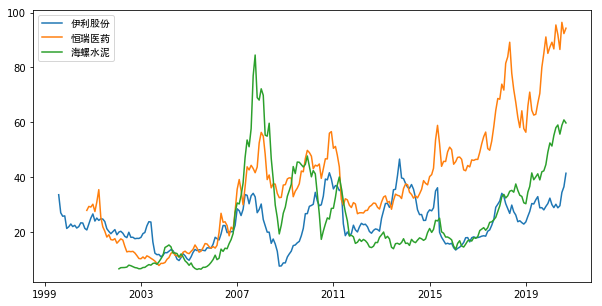

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(df_p["伊利股份"], label="伊利股份")
plt.plot(df_p["恒瑞医药"], label="恒瑞医药")
plt.plot(df_p["海螺水泥"], label="海螺水泥")
pltz.legend()
plt.show()

# Return and volatility

Return formula:

$$ R_{t,t+1} = \frac{P_{t+1}-P_{t}}{P_{t}} $$

or alternately

$$ R_{t,t+1} = \frac{P_{t+1}}{P_{t}} - 1 $$

In [6]:
df_r = df_p.pct_change()
# df_r.to_csv(save_return_path, encoding="utf_8_sig")

In [7]:
df_r.head()

name,伊利股份,恒瑞医药,海螺水泥
trade_date,,,
1999-08-01,NaN,NaN,NaN
1999-09-01,-0.196442,NaN,NaN
1999-10-01,-0.046369,NaN,NaN
1999-11-01,0.004881,NaN,NaN
1999-12-01,-0.177359,NaN,NaN


In [121]:
for stock in stock_list:
    print("{}: Return: {}%, Volatility: {}".format(
        stock, 
        (df_r[stock].mean() * 100).round(2),
        df_r[stock].std().round(4)
    ))

伊利股份: Return: 0.61%, Volatility: 0.099
海螺水泥: Return: 1.53%, Volatility: 0.1031
恒瑞医药: Return: 0.92%, Volatility: 0.091


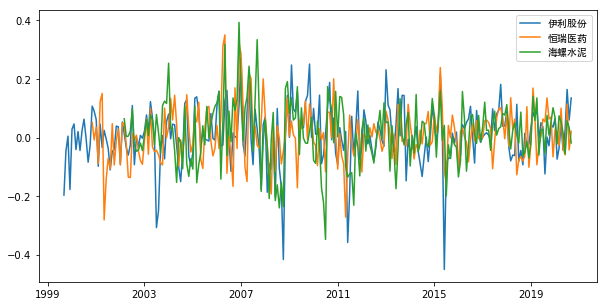

In [68]:
plt.figure(figsize=(10, 5))
plt.plot(df_r["伊利股份"], label="伊利股份")
plt.plot(df_r["恒瑞医药"], label="恒瑞医药")
plt.plot(df_r["海螺水泥"], label="海螺水泥")
pltz.legend()
plt.show()

# Compounding returns

In [112]:
for stock in stock_list:
    print("{}: {}%".format(
        stock, 
        (((df_r[stock] + 1).prod() - 1) * 100).round(2)
    ))

伊利股份: 23.29%
海螺水泥: 809.74%
恒瑞医药: 238.37%


# Annualizing Returns

To annualize a return for a period, you compound the return for as many times as there are periods in a year. For instance, to annualize a monthly return you compund that return 12 times. The formula to annualize a monthly return $R_m$ is:

$$ (1+R_m)^{12} - 1$$

To annualize a quarterly return $R_q$ you would get:

$$ (1+R_q)^{4} - 1$$

And finally, to annualize a daily return $R_d$ you would get:

$$ (1+R_d)^{252} - 1$$

In [113]:
# Monthly average return (%)
(df_r.mean() * 100).round(2)

name
伊利股份    0.61
恒瑞医药    0.92
海螺水泥    1.53
dtype: float64

In [114]:
# Yearly average return (%)
(((df_r.mean() + 1) ** 12 - 1) * 100).round(2)

name
伊利股份     7.60
恒瑞医药    11.57
海螺水泥    19.98
dtype: float64

# Annualizing Volatility

We annualize volatility by scaling (multiplying) it by the square root of the number of periods per observation

Therefore, to annualize the volatility of a monthly series, we muiltiply it by the square root of 12.

In [122]:
# Monthly volatility
df_r.std().round(4)

name
伊利股份    0.0990
恒瑞医药    0.0910
海螺水泥    0.1031
dtype: float64

In [123]:
# Yearly volatility
(df_r.std() * (12 ** 0.5)).round(4)

name
伊利股份    0.3429
恒瑞医药    0.3154
海螺水泥    0.3573
dtype: float64

# Sharpe ratio

In [126]:
risk_free = 0.03
yearly_return = ((df_r.mean() + 1) ** 12 - 1)
excess_return = yearly_return - risk_free
yearly_vol = df_r.std() * (12 ** 0.5)
sharpe_ratio = excess_return / yearly_vol

In [127]:
sharpe_ratio

name
伊利股份    0.134042
恒瑞医药    0.271652
海螺水泥    0.475267
dtype: float64